In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

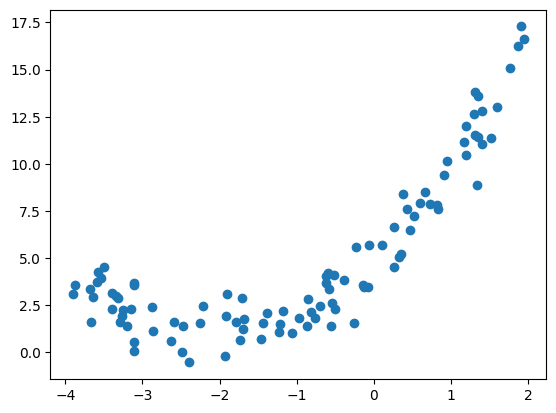

In [5]:
np.random.seed(233)
x = np.random.uniform(-4,2, size=100)
y = x**2 + 4*x + 3 + 2 + np.random.randn(100)
X = x.reshape(-1, 1)
plt.scatter(x,y)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

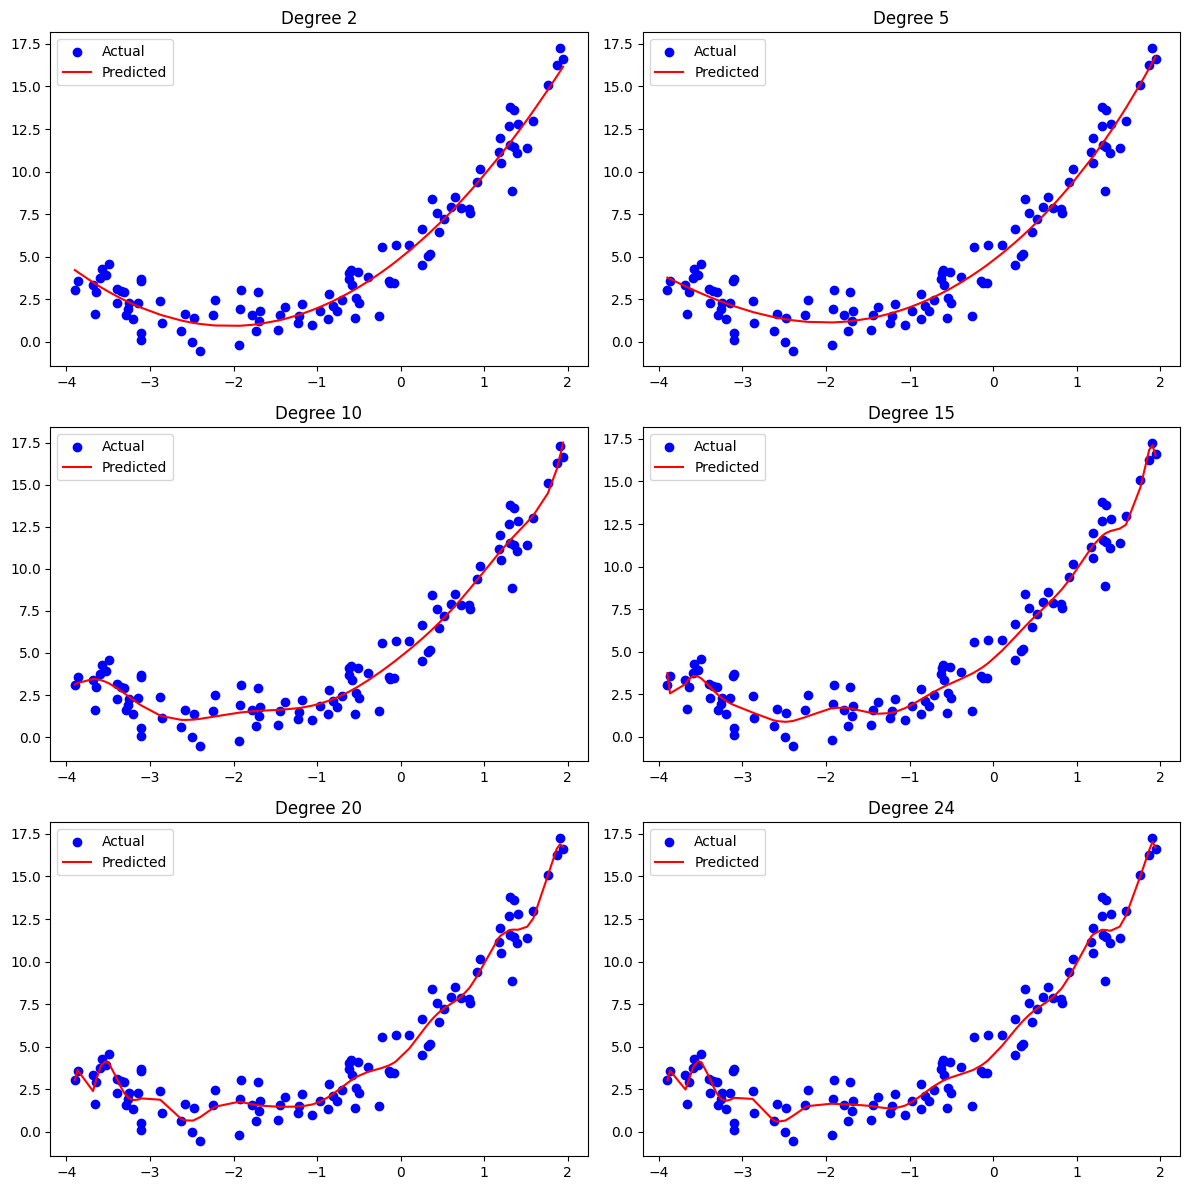

In [12]:
degrees = [2, 5, 10, 15, 20, 24]
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(X)
    lin_reg = LinearRegression()
    lin_reg.fit(x_poly, y)
    y_pred = lin_reg.predict(x_poly)
    
    row = i // 2  # 计算当前子图的行索引
    col = i % 2   # 计算当前子图的列索引
    
    axs[row, col].scatter(X, y, color='blue', label='Actual')
    axs[row, col].plot(np.sort(x), y_pred[np.argsort(x)], color='red', label='Predicted')
    axs[row, col].set_title(f'Degree {degree}')
    axs[row, col].legend()

plt.tight_layout()  # 调整子图之间的间距
plt.show()

## 划分数据

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

In [17]:
x_train.shape, y_train.shape

((70,), (70,))

## 绘制学习曲线

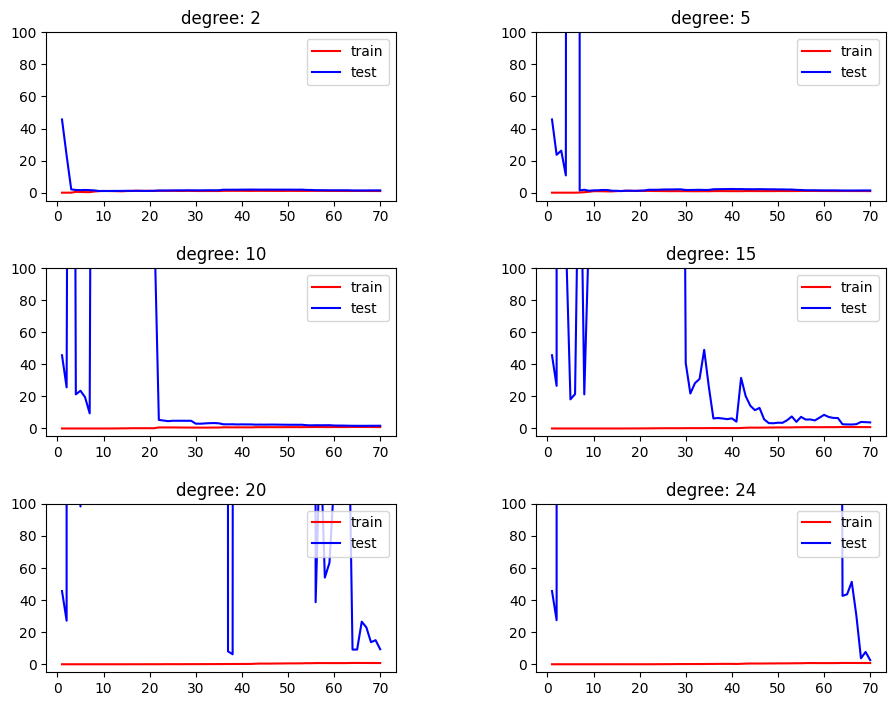

In [39]:
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (12, 8)
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

degrees = [2, 5, 10, 15, 20, 24]

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))

    train_error, test_error = [], []
    for k in range(len(x_train)):
        lin_reg = LinearRegression()
        lin_reg.fit(x_poly_train[:k+1], y_train[:k+1])
        
        y_train_pred = lin_reg.predict(x_poly_train[:k+1])
        train_error.append(mean_squared_error(y_train[:k+1], y_train_pred))
        
        y_test_pred = lin_reg.predict(x_poly_test)
        test_error.append(mean_squared_error(y_test, y_test_pred))

    plt.subplot(3, 2, i + 1)
    plt.title(f"degree: {degree}")
    plt.ylim(-5,100)
    plt.plot([k+1 for k in range(len((x_train)))], train_error, color='red', label='train')
    plt.plot([k+1 for k in range(len((x_train)))], test_error, color='blue', label='test')
    plt.legend(loc='upper right')

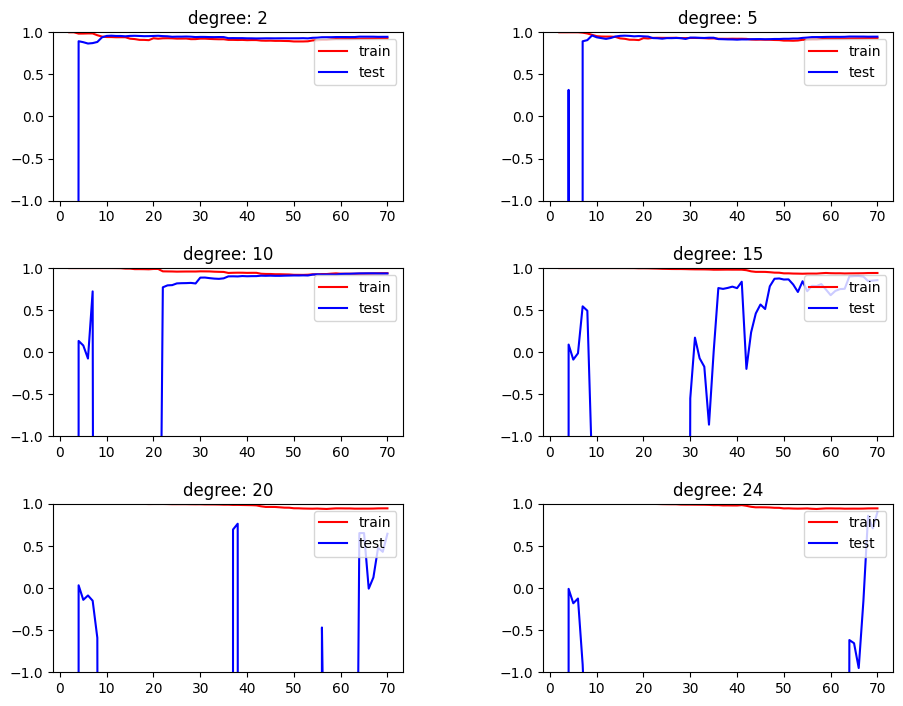

In [46]:
from sklearn.metrics import mean_squared_error


plt.rcParams['figure.figsize'] = (12, 8)
plt.subplots_adjust(left=0.1, right=0.8, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

degrees = [2, 5, 10, 15, 20, 24]

for i, degree in enumerate(degrees):
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly_train = polynomial_features.fit_transform(x_train.reshape(-1, 1))
    x_poly_test = polynomial_features.fit_transform(x_test.reshape(-1, 1))

    train_error, test_error = [], []
    for k in range(1, len(x_train)):
        lin_reg = LinearRegression()
        lin_reg.fit(x_poly_train[:k+1], y_train[:k+1])
        train_error.append(lin_reg.score(x_poly_train[:k+1], y_train[:k+1]))
        test_error.append(lin_reg.score(x_poly_test[:k+1], y_test[:k+1]))

    plt.subplot(3, 2, i + 1)
    plt.title(f"degree: {degree}")
    plt.ylim(-1,1)
    plt.plot([k+1 for k in range(1, len((x_train)))], train_error, color='red', label='train')
    plt.plot([k+1 for k in range(1, len((x_train)))], test_error, color='blue', label='test')
    plt.legend(loc='upper right')